# **House Prices: Advanced Regression Techniques**

---



## 1. Import lib

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import pandas_profiling
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 2. Import dataset 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train (1).csv
User uploaded file "train.csv" with length 460676 bytes


In [0]:
train = pd.read_csv('train.csv')
print('Shape of training data:', train.shape)

Shape of training data: (1460, 81)


### 2.1. Overview of the dataset

In [0]:
type(train)


pandas.core.frame.DataFrame

In [0]:
train.head()


In [0]:
pandas_profiling.ProfileReport(train)

### 2.2. Classification of **data**

####2.2.1. Check datatypes of each variable

In [0]:
group_var = train.columns.to_series().groupby(train.dtypes).groups
group_var

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

**Note 1:** From the list of data types above, there is no variable that is in the wrong format. No need to convert to correct format.

#### 2.2.2. Quantitative vs. Qualitative

In [0]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print('- Number of Quantitative attributes: %d' % len(quantitative))
#print(quantitative)
print('- Number of Qualitative attributes: %d' % len(qualitative))
#print(qualitative)

- Number of Quantitative attributes: 36
- Number of Qualitative attributes: 43


In [0]:
for f in qualitative:
  print(f, pd.Series.unique(train[f]))

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

**Note:** Def need to re-order the values of some variables

## 3. Base-line modeling

In this project, I want to apply linear regression models to predict house price: 
  - Linear Regression (OLS) 
  - Linear Regression (Gradient Descent)

Also, I want to build a logistic regression model to classify data. (But this will be minor goals)

In this section, I run a baseline model in order to see how the model is improved after EDA and preprocessing steps. 
- No surprise that I have lots of issue with running barely a simple regression model before preprocessing

In [0]:
# quick cleaning
base_train = train[quantitative].dropna()
y = base_train['SalePrice']
X_basetrain, X_basetest, y_basetrain, y_basetest = train_test_split(base_train, y, test_size = 0.3, random_state = 0)

In [0]:
type(y_basetrain)

In [0]:
# linear regression - OLS 
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr_fit = regr.fit(X_train, y_train)
#y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


## 4. EDA 
Reference:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/ apparently

Quick handling missing data
- There is no cases where all elements are missing

In [0]:
# Drop row if all values are missing
train_nomissing = train.copy()
train_nomissing = train.dropna(how='all')
train_nomissing.shape

(1460, 81)

In [0]:
# Fill NA as 'Missing' 
for c in qualitative:
  train_nomissing[c] = train[c].astype('category')
  if train_nomissing[c].isnull().any():
    train_nomissing[c] = train_nomissing[c].cat.add_categories(['MISSING'])
    train_nomissing[c] = train_nomissing[c].fillna('MISSING')

### 4.1. Analysing 'SalePrice'

- SalePrice is obviously not normally distributed
- There are a number of outlier
- To minimize the effect of outlier, we need to do log transform to SalePrice

In [0]:
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


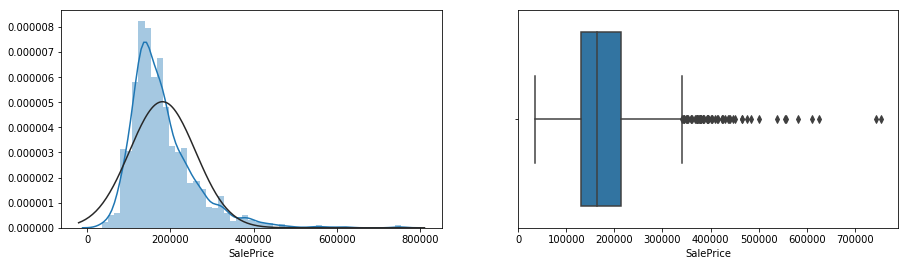

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15, forward=True)
sns.distplot(train['SalePrice'], fit=stats.norm, ax=ax1)
sns.boxplot(x=train['SalePrice'])

Before heading to any details, I would love to have a look at 2 "Overall" variables in correlation to SalePrice: Overall Quality & Overall Condition. 
- Overall Quality seems to explain SalePrice very well. 
- It looks like people pay more for good quality than good condition. Let see if it is true with other 'Qual' and 'Cond' variables

In [0]:
# Draw boxplot
def boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x=plt.xticks(rotation=90) 

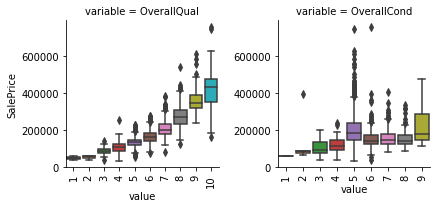

In [0]:
var = ['OverallQual','OverallCond']
f = pd.melt(train_nomissing, id_vars=['SalePrice'], value_vars=var)
g = sns.FacetGrid(f, col='variable',  col_wrap=5, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'SalePrice')

### 4.2. 'SalePrice' vs. Categorical data

I would like to explore the ability to explain the Sale Price of some categorical variables to feed idea for feature engineering. I separate into 2 groups: (1) includes variables that are graded in different scale rand (2) includes variables that are classified
- The assumption that people care more about quality than condition might also hold true here as people pay more when the quality is higher. We can see at ExterQual, BsmtQual
- When it comes to internal funiture, quality is also a signal to predict higher SalePrice as can be seen in HeatingQC, KitchenQual and FirePlaceQu
- However, regarding garage people seem to care more about area, quality and condition might not be a good indicator for an expensive house

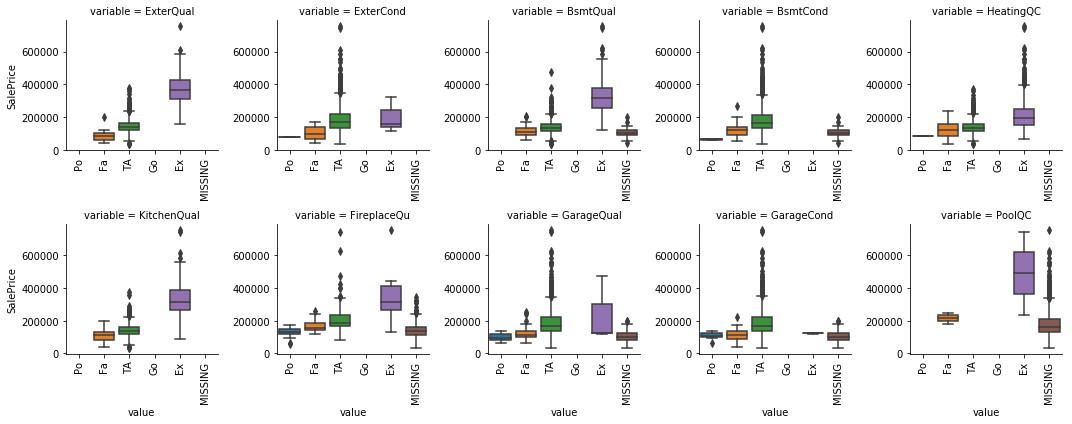

In [0]:
#train_nomissing = train.copy()
qual_var = [i for i in qualitative for j in range(len(train[i].unique())) if train[i].unique()[j]=='Fa'] 
#qual_var
level = CategoricalDtype(categories=["Po","Fa","TA","Go","Ex", "MISSING"],
                               ordered=True)
f = pd.melt(train_nomissing, id_vars=['SalePrice'], value_vars=qual_var)
f.value = f.value.astype(level)
g = sns.FacetGrid(f, col='variable',  col_wrap=5, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'SalePrice')

Some other categorical features that might signal a higher SalePrice are:
- RoofMatl
- Utilities (AllPub)
- Neighborhood
- MasVnrType
- PavedDrive
- GarageType (Builtin)
- Condition2 (not 1)
- Other necessities: Heating, CentralAC

There are also some variables that are suspicious of multicollinearity
- BsmtFinType1
- BsmtFinType2

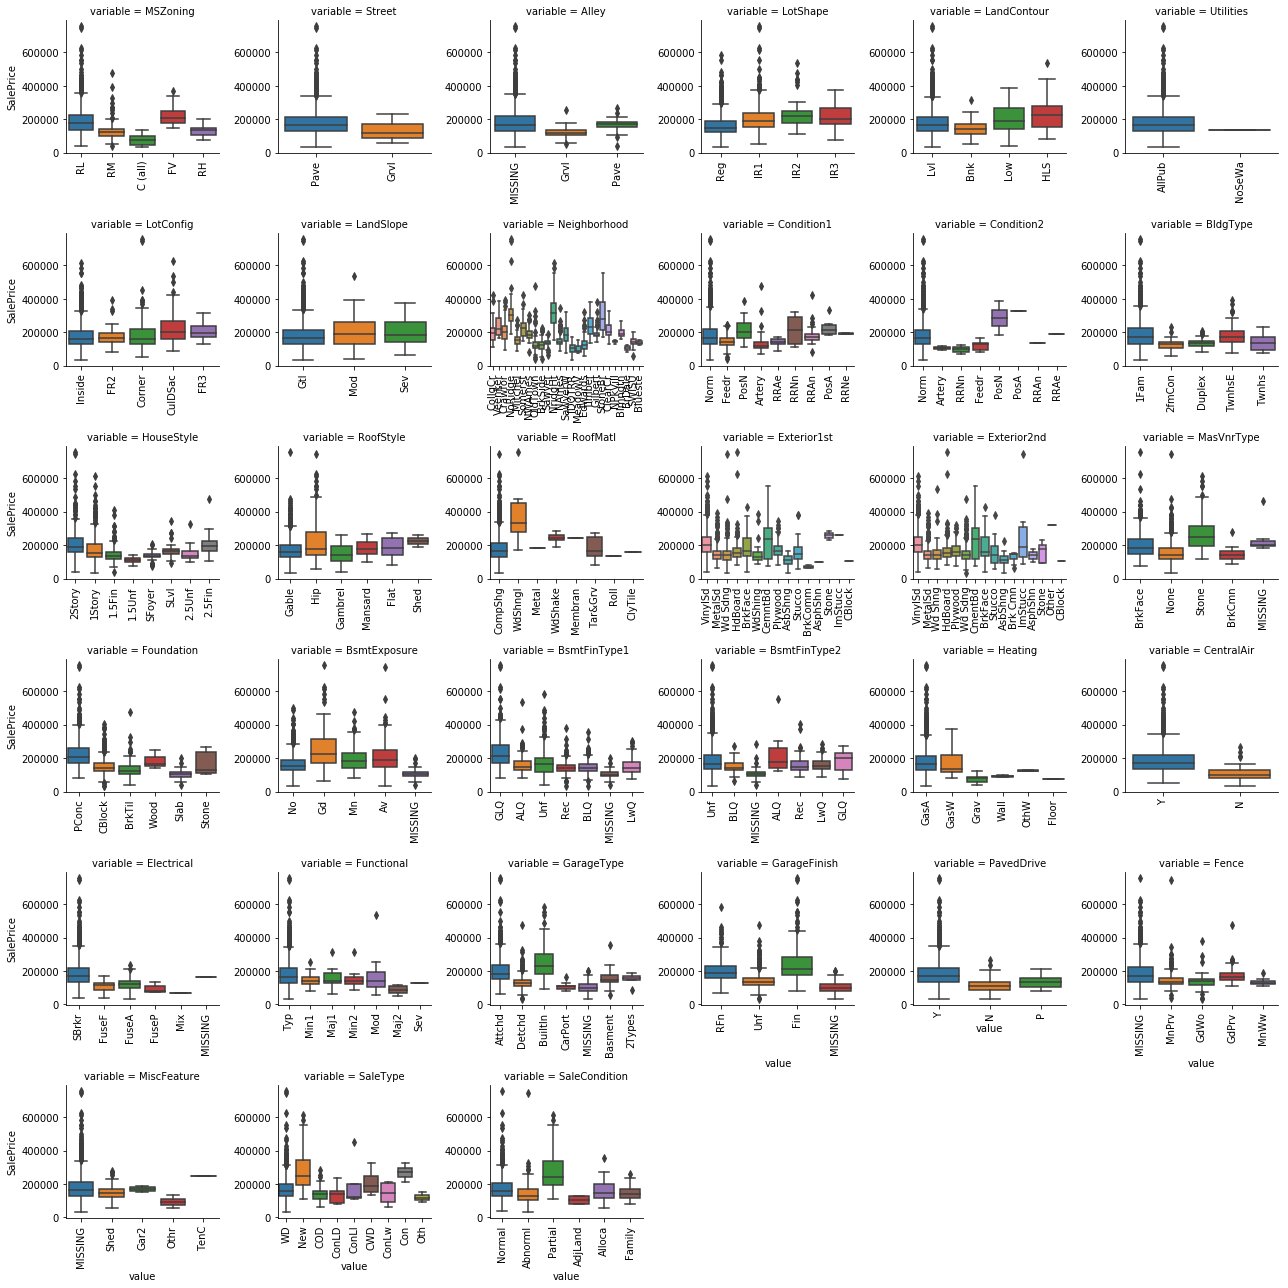

In [0]:
qual_left = [i for i in qualitative if i not in qual_var]
f = pd.melt(train_nomissing, id_vars=['SalePrice'], value_vars=qual_left)
g = sns.FacetGrid(f, col='variable',  col_wrap=6, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'SalePrice')

### 4.3. 'SalePrice' vs. Numerical data

- First, I run Pearson correlation to have an overview of what  impact SalePrice most, which include:


*A note to myself https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php Pearson correlation test the strength of a linear association*

- Not only I see the features that are important to explain SalePrice but also some features that correlates strongly with each other which should cause **multicollinearity** , such as:

GarageCars       0.640409


GarageArea       0.623431


TotalBsmtSF      0.613581

1stFlrSF         0.605852

*A note to myself: Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.*






In [0]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

A closer look at multicolinearity. There are other pairs as well:
- GarageCars & GarageArea
- TotalBsmtSF & 1stFlrSF
- GarageYrBlt & YearBuilt
- TotRmAbvGrd & GrLivArea
- TotRmAbvGrd & BedroomAbvGrd 
- LotFrontage & LotArea 
This issue will be handled in [Part 5.1](https://colab.research.google.com/drive/1Bg0F4JllTM8k3cDY8gUFO3urkg29S_67#scrollTo=hGemULGBs13l)

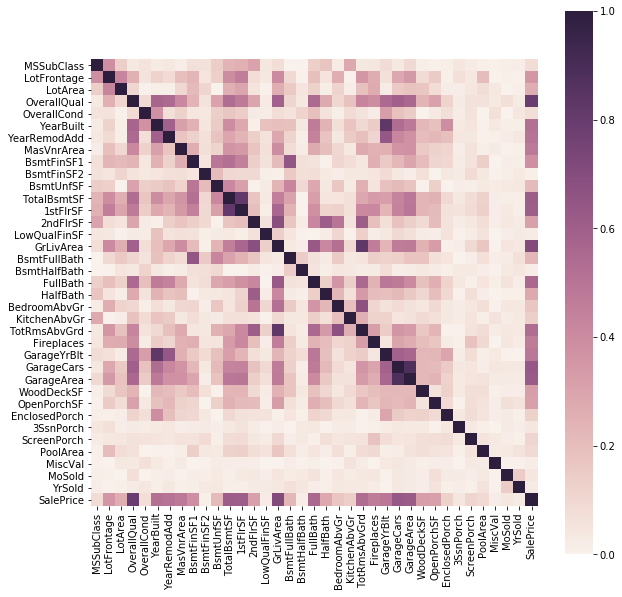

In [0]:
cmap = sns.cubehelix_palette(light = 0.95, as_cmap = True)
plt.figure(figsize = (10, 10))
sns.heatmap(abs(train.drop(['Id'], axis=1).corr(method = 'pearson')), vmin = 0, vmax = 1, square = True, cmap = cmap)

## 5. Feature Engineering

In [0]:
train_new = train.copy()

### 5.1. Reduce multicollinearity
Remove the independent variables that strongly correlate with others. Keep one that can explain the target variable, including: 
- GarageCars (alternative: GarageArea)
- 1stFlrSF and TotalBsmtSF: we will keep both as some donot have basement
- GarageYrBlt (alternative: YearBuilt)
- TotRmsAbvGrd (alternative: GrLivArea)
- BedroomAbvGr (alternative: GrLivArea)
- LotFrontage and LotArea: although LotFrontage have a slightly stronger correlation with SalePrice, it has more missing data than LotArea. Such issue is solved in [Part 5.3](https://colab.research.google.com/drive/1Bg0F4JllTM8k3cDY8gUFO3urkg29S_67#scrollTo=_4GkAa2k_O4n)

In [0]:
train_new = train_new.drop(columns = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'BedroomAbvGr'])

In [80]:
train_new.shape

(1460, 77)

### 5.2. Log transformation
- From the above analysis, we need to do log transformation to SalePrice. As a result, the new version of SalePrice has now come in normal distribution. 
- We also want to investigate if there are any other numerical variables that need the transformation. As it shows, 

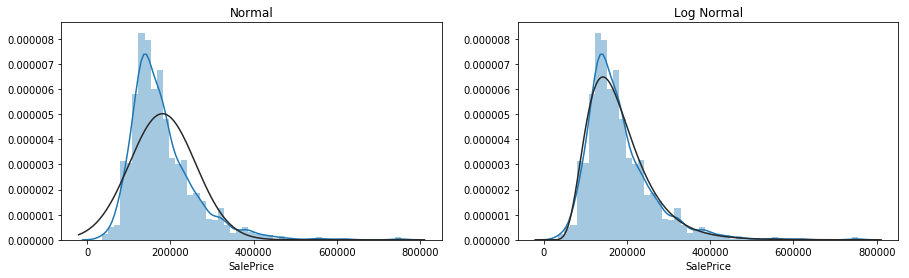

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15, forward=True)
ax1.set_title('Normal')
sns.distplot(train['SalePrice'], fit=stats.norm, ax=ax1)
ax2.set_title('Log Normal')
sns.distplot(train['SalePrice'], fit=stats.lognorm, ax=ax2)

- Let see if there are any numerical variables that need to do log transformation by checking their distribution. 
- Log transformation can be done to: *GrLivArea*, *1stFlrSF*, *TotalBsmtSF*, *GarageArea*, *LotFrontage*, *LotArea* and others.


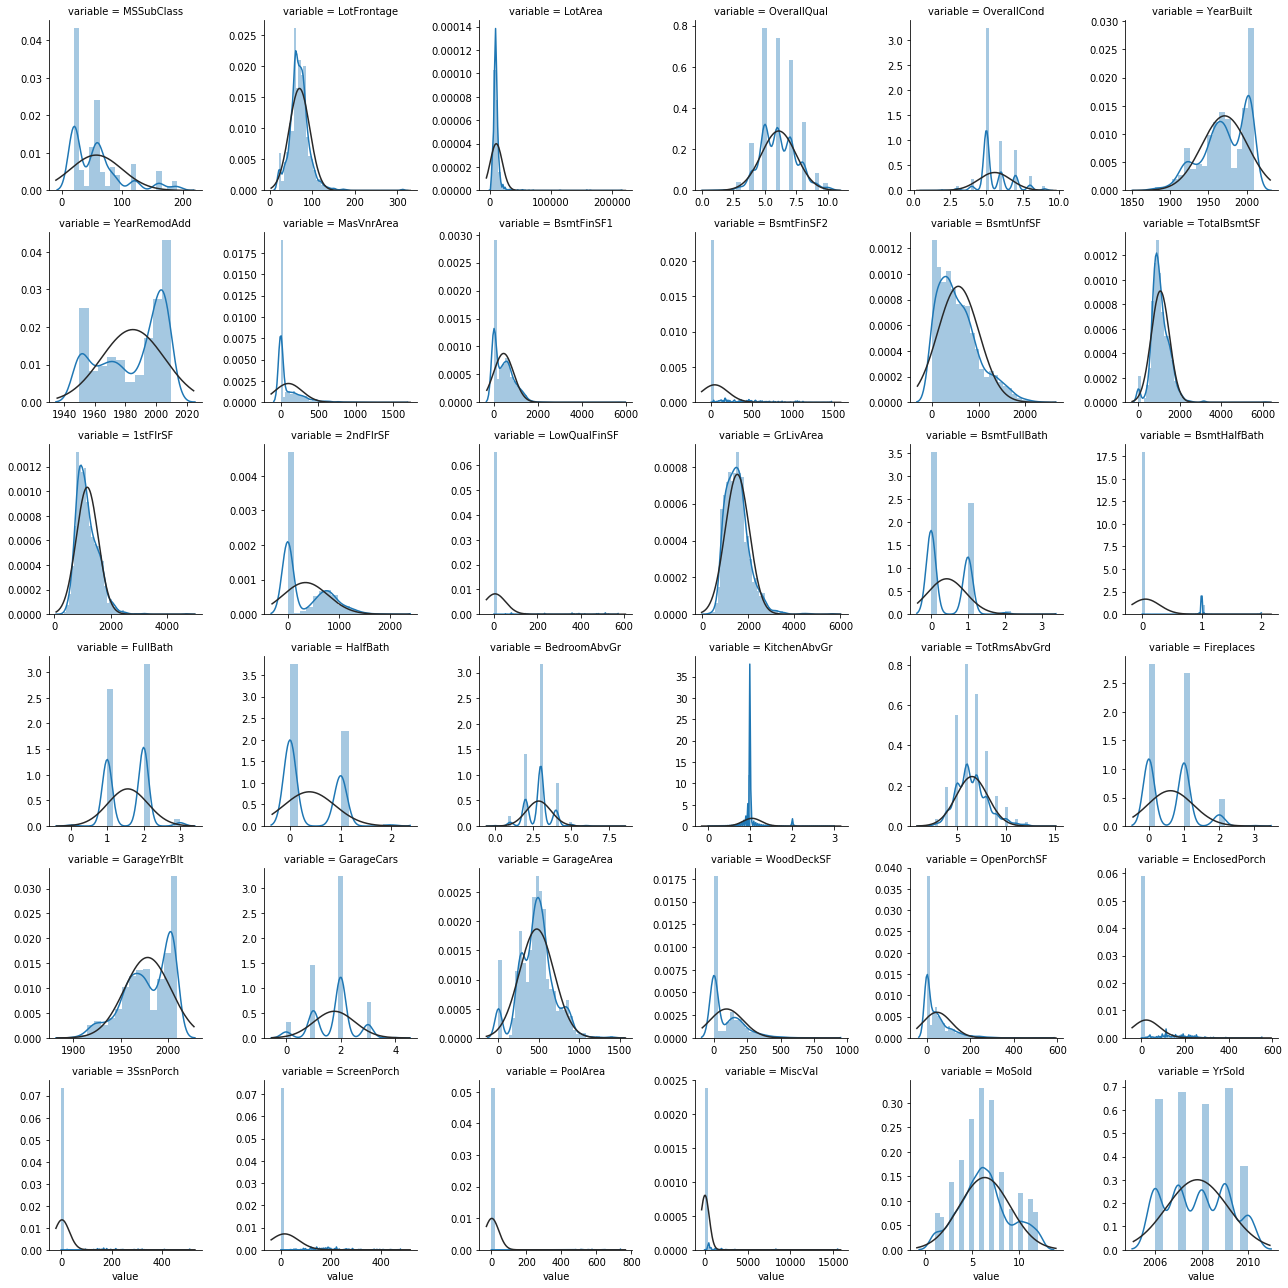

In [0]:
f = pd.melt(train, value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=6, sharex=False, sharey=False)
grid = grid.map(sns.distplot, 'value', fit=stats.norm)
grid

In [0]:
def log_transform(feature):
  train_new[feature] = np.log1p(train_new[feature].values)

log_transform('LotArea')
log_transform('TotalBsmtSF')
log_transform('1stFlrSF')
log_transform('GrLivArea')
log_transform('GarageArea')
log_transform('SalePrice')
  

### 5.3. Missing data

#### a) Detect missing data

Decision on missing data:
- *PoolQC*, *MiscFeatures*, *Alley*, *Fence* stand a good chance to be outliers -> **REMOVE**
- *FireplaceQu* -> **Need to do A/B testing to decide**
- *LotFrontage* has a strong correlation with *LotArea* -> **Need to do A/B testing to decide**
- Some Garage features have strong correlations with *GarageArea*. The same applies for all Basement features. We don't need these features to predict target variable -> **Evaluate to remove and impute** 
- *MasVnrArea* and *Electrical* -> **Impute with median**


In [77]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (round(train.isnull().sum() / train.isnull().count()*100, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data = missing_data[missing_data['Total']>0]
print(missing_data.count())
missing_data

Total    19
%        19
dtype: int64


,Total,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


#### b) Handle missing data

In [114]:
# Drop columns due to too many NaN
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_new = train_new.drop(columns=cols_to_drop)
train_new.shape

(1460, 74)

In [0]:
# Drop 'PoolArea' as there are only 7 observation with area above 0
#train_new[train_new['PoolArea']>0].count() #7
train_new = train_new.drop(columns='PoolArea')

In [116]:
# Drop columns as they can be explained by others 
cols_to_drop2 = ['GarageType', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'GarageCond', 'BsmtCond']
train_new = train_new.drop(columns=cols_to_drop2)
train_new.shape

(1460, 65)

In [128]:
type(train_new['MasVnrArea_ip'])

pandas.core.series.Series

In [0]:
# Fill NaN for numerical var with Median
train_new['MasVnrArea_ip'] = train_new['MasVnrArea'].fillna(train_new['MasVnrArea'].median)
train_new['Electrical_ip'] = train_new['Electrical'].fillna(train_new['Electrical'].median)
train_new['LotFrontage_ip'] = train_new['LotFrontage'].fillna(train_new['LotFrontage'].median)

In [0]:
# Fill NaN for categorical
#train_new['GarageQual'] = train_new['GarageQual'].fillna('TA')
#train_new['BsmtQual'] = train_new['BsmtQual'].fillna('TA')
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("TA")
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("TA")

In [134]:
# Check if there is any Nan
total = train_new.isnull().sum().sort_values(ascending=False)
percent = (round(train_new.isnull().sum() / train_new.isnull().count()*100, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data = missing_data[missing_data['Total']>0]
print(missing_data.count())
missing_data

Total    3
%        3
dtype: int64


,Total,%
LotFrontage,259,17.74
MasVnrArea,8,0.55
Electrical,1,0.07


### 5.4. Outliers

- This guide suggests removing any houses that have area above 4000 SF. http://jse.amstat.org/v19n3/decock.pdf 
- Only 04 cases fall in this rule. We will do A/B testing with this. 

In [100]:
train_new['GrLivArea'].describe()

count    1460.000000
mean        7.268512
std         0.333303
min         5.814131
25%         7.030415
50%         7.289611
75%         7.483104
max         8.638171
Name: GrLivArea, dtype: float64

In [0]:
train_new = train_new[train_new['GrLivArea'] < 4000]

In [97]:
train_new.shape

(1460, 63)

### 5.5. Modification of variables

#### a) Numerical to categorical

In [101]:
# Some numerical features are actually really categories
train_new = train_new.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
print(train_new['MSSubClass'].unique())
print(train_new['MoSold'].unique())


['SC60' 'SC20' 'SC70' 'SC50' 'SC190' 'SC45' 'SC90' 'SC120' 'SC30' 'SC85'
 'SC80' 'SC160' 'SC75' 'SC180' 'SC40']
['Feb' 'May' 'Sep' 'Dec' 'Oct' 'Aug' 'Nov' 'Apr' 'Jan' 'Jul' 'Mar' 'Jun']


#### b) Create new variables

In [0]:
train_new['IsNew'] = train_new['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
#train_new['HasMasVnr'] = train_new['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train_new['AllSF'] = train_new['GrLivArea'] + train_new['TotalBsmtSF']
train_new['AllFlrsSF'] = train_new['1stFlrSF'] + train_new['2ndFlrSF']

#### c) Convert all categorical into dummy variable

In [0]:
train_new['BsmtQual'].describe()

In [0]:
group_var1 = train_new.columns.to_series().groupby(train_new.dtypes).groups
group_var1

In [0]:
#convert categorical variable into dummy
train_new = pd.get_dummies(train_new)

In [0]:
train_new.shape

(1456, 296)

## 6. Model

### 6.1. Linear regression - OLS

In [0]:
y = train_new['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(train_new, y, test_size = 0.3, random_state = 0)

In [142]:
print('Shape of training features:', X_train.shape)
print('Shape of training features:', y_train.shape)
print('Shape of training target:', X_test.shape)
print('Shape of training target:', y_test.shape)

Shape of training features: (1022, 68)
Shape of training features: (1022,)
Shape of training target: (438, 68)
Shape of training target: (438,)


In [0]:
# linear regression - OLS 
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr_fit = regr.fit(X_train, y_train)
regr_pred = regr.predict(X_test)

regr_score = regr.score(X_test, y_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr_pred))
print('RMSE: ', error(y, np.exp(regr.predict(X))))

In [0]:
def draw_confusion_matrix_with_seaborn(test_label, predictions, score):
    cm = metrics.confusion_matrix(yTest, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    plt.show()

In [0]:
draw_confusion_matrix_with_seaborn(y_test, regr_pred, regr_score)

### 6.2. Logistic regression

In [150]:
train_log = train_new.copy()
train_log.shape

(1460, 68)

In [153]:
train_log = pd.merge(train_log, train, how='left', on='ID')
train_log.shape

KeyError: ignored

In [152]:
train_log.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,AllSF,AllFlrsSF
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,9.110966,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,6.750560,7.008452,346.992466,5.844521,7.268512,0.425342,0.057534,1.565068,0.382877,1.046575,0.613014,5.808156,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,12.024057,2572.893151,1509.619178
std,421.610009,42.300571,24.284752,0.517369,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,1.145712,0.317431,436.528436,48.623081,0.333303,0.518911,0.238753,0.550916,0.502885,0.220338,0.644666,1.455118,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,0.399449,823.598492,521.163523
min,1.000000,20.000000,21.000000,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271,334.000000,334.000000
25%,365.750000,20.000000,59.000000,8.929898,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,6.680541,6.783325,0.000000,0.000000,7.030415,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.815592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105,2014.000000,1123.750000
50%,730.500000,50.000000,69.000000,9.156887,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,6.900227,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.175867,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512,2479.000000,1458.000000
75%,1095.250000,70.000000,80.000000,9.358976,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,7.169542,7.238676,728.000000,0.000000,7.483104,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,6.357842,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736,3008.500000,1775.250000
max,1460.000000,190.000000,313.000000,12.279537,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,8.717846,8.453827,2065.000000,572.000000,8.638171,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,7.257708,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,13.534474,11752.000000,5642.000000


In [0]:
if train_log.['SalePrice'] > 214000:
  train_log.['SP_cat'] = 'High' 
  elif train_log.['SalePrice'] <= 214000 and train_log.['SalePrice'] > 129975:
    train_log.['SP_cat'] = 'Average'
    else train_log.['SP_cat'] = 'Low'

In [0]:
y_log = train_log['SP_cat']
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(train_log, y_log, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logRegr.fit(X_trainlog, y_trainlog)
softmax_predictions = logRegr.predict(X_testlog)
softmax_score = logRegr.score(softmax_predictions = logRegr.predict(X_testlog)
, y_testlog)
print(softmax_score)
draw_confusion_matrix_with_seaborn(y_testlog, softmax_predictions, softmax_score)

### 6.3. Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#train
clf.fit(X_trainlog, y_trainlog)
#test
y_pred_clf = clf.predict(X_testlog)

#compute f1 score
from sklearn.metrics import f1_score
print("F1 Score: %.2f%%" % (f1_score(y_testlog, y_pred_clf, average='weighted') * 100.0))